In [1]:
import os,cv2
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [2]:
import json
with open('JSON/train.json') as f:
  train = json.load(f)

## Resize pictures

Dimension: (1200, 1600, 3)


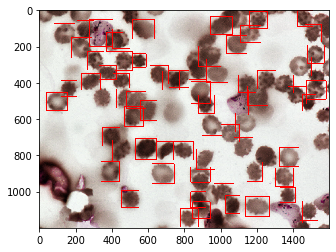

In [3]:
a=train[np.random.poisson(1)]
img=cv2.imread("malaria"+a['image']['pathname'])
b=a['objects']
for i in range(len(b)):
    category = b[i]['category']
    box = b[i]['bbx']
    x1,x2,y1,y2 = box['x1'],box['x2'],box['y1'],box['y2']
    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
    
print("Dimension:",img.shape)
plt.figure()
plt.imshow(img)

Dimension: (224, 224, 3)


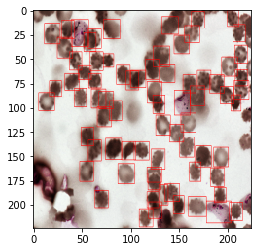

In [4]:
im = cv2.resize(img,(224,224), interpolation = cv2.INTER_AREA)
print("Dimension:",im.shape)
plt.imshow(im)

Boxes seem to fit the images better after resizing. This is a general situation, and here just take one example.

## Selective search

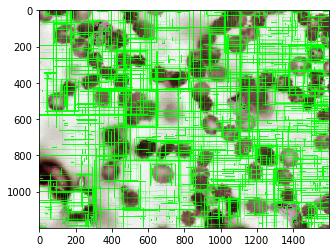

In [5]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

im=cv2.imread("malaria"+a['image']['pathname'])
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
rects = rects[np.random.RandomState(seed=1).permutation(len(rects))[:2000]]

for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)